In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/shaury/final.csv',index_col='Unnamed: 0')
pd.set_option("display.max_columns", None)

In [3]:
df.fillna(0,inplace=True)

In [4]:
df.head()

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,LATE_AIRCRAFT_DELAY,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precipitation,Condition,time
0,2018-01-01,ATL,EWR,1819,1818.0,-1.0,1834.0,2004.0,17.0,2048,-27.0,0.0,0.0,149.0,123.0,90.0,746.0,0.0,0.0,0.0,25,8,49,12,0,29.36,0.0,Fair,2018-01-01 18:18:00
1,2018-01-01,ATL,SFO,730,729.0,-1.0,750.0,948.0,4.0,956,-4.0,0.0,0.0,326.0,323.0,298.0,2139.0,0.0,0.0,0.0,19,5,54,13,0,29.27,0.0,Cloudy,2018-01-01 07:29:00
2,2018-01-01,ATL,EWR,1555,1549.0,-6.0,1626.0,1826.0,29.0,1816,39.0,0.0,0.0,141.0,186.0,120.0,746.0,0.0,0.0,0.0,28,11,49,9,0,29.33,0.0,Cloudy,2018-01-01 15:49:00
3,2018-01-01,ATL,ORD,1748,1751.0,3.0,1808.0,1843.0,3.0,1901,-15.0,0.0,0.0,133.0,115.0,95.0,606.0,0.0,0.0,0.0,27,10,49,13,0,29.35,0.0,Partly Cloudy,2018-01-01 17:51:00
4,2018-01-01,ATL,IAD,943,1005.0,22.0,1023.0,1133.0,3.0,1130,6.0,0.0,0.0,107.0,91.0,70.0,534.0,0.0,0.0,0.0,19,6,57,15,0,29.36,0.0,Light Snow,2018-01-01 10:05:00


In [5]:
df['WEATHER_DELAY'].value_counts()

0.0      379167
10.0        257
6.0         245
7.0         244
8.0         232
          ...  
697.0         1
349.0         1
213.0         1
355.0         1
521.0         1
Name: WEATHER_DELAY, Length: 452, dtype: int64

In [6]:
df1 = df[df['WEATHER_DELAY']>0]

<AxesSubplot:xlabel='WEATHER_DELAY', ylabel='Density'>

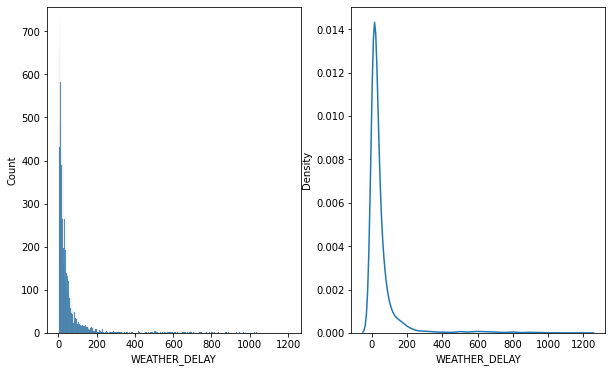

In [7]:
fig,axes = plt.subplots(ncols=2,figsize=(10,6))
sns.histplot(ax=axes[0],x=df1['WEATHER_DELAY'],bins=500)
sns.kdeplot(ax=axes[1],x=df1['WEATHER_DELAY'])

In [8]:
def mapiings(x):
    if(x==0):
        return 0
    elif(x<30):
        return 30
    elif(x<60):
        return 60
    elif(x<120):
        return 120
    else:
        return 121
df['delay'] = df['WEATHER_DELAY'].map(mapiings)

In [9]:
df['delay'].value_counts()

0      379167
30       5174
60       1565
120       954
121       715
Name: delay, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387557 entries, 0 to 390078
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              387557 non-null  object 
 1   ORIGIN               387557 non-null  object 
 2   DEST                 387557 non-null  object 
 3   CRS_DEP_TIME         387557 non-null  int64  
 4   DEP_TIME             387557 non-null  float64
 5   DEP_DELAY            387557 non-null  float64
 6   WHEELS_OFF           387557 non-null  float64
 7   WHEELS_ON            387557 non-null  float64
 8   TAXI_IN              387557 non-null  float64
 9   CRS_ARR_TIME         387557 non-null  int64  
 10  ARR_DELAY            387557 non-null  float64
 11  CANCELLED            387557 non-null  float64
 12  DIVERTED             387557 non-null  float64
 13  CRS_ELAPSED_TIME     387557 non-null  float64
 14  ACTUAL_ELAPSED_TIME  387557 non-null  float64
 15  AIR_TIME         

In [11]:
df.loc[df['Condition']=='0','Condition'] = None

In [12]:
df['Condition'].value_counts()

Mostly Cloudy              122947
Fair                        84859
Partly Cloudy               56165
Cloudy                      52473
Light Rain                  21717
Fog                          5510
Light Drizzle                4960
Rain                         2728
Fair / Windy                 2334
Drizzle and Fog              1718
Thunder in the Vicinity      1574
Mostly Cloudy / Windy        1483
Cloudy / Windy               1412
T-Storm                      1189
Heavy Rain                   1173
Thunder                      1107
Light Rain with Thunder      1010
Haze                          908
Heavy T-Storm                 631
Mist                          477
Partly Cloudy / Windy         430
Rain / Windy                  326
Light Rain / Windy            311
Heavy Rain / Windy            188
Light Snow                    164
Heavy T-Storm / Windy         139
Patches of Fog                 48
Name: Condition, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Condition'>

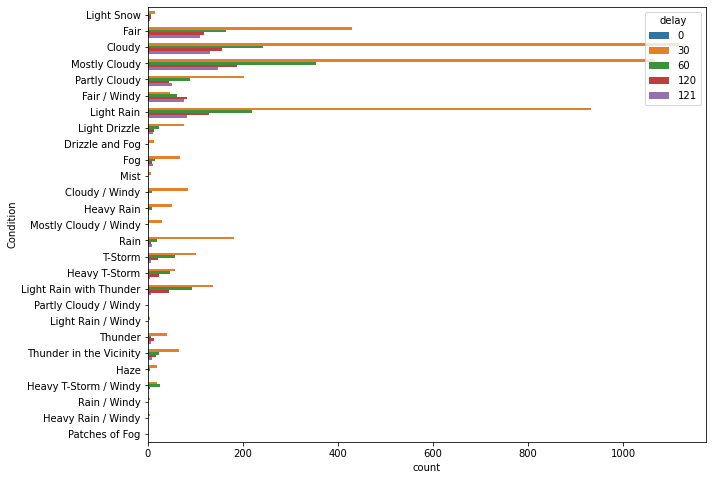

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(y=df[df['delay']>0]['Condition'],hue=df['delay'])

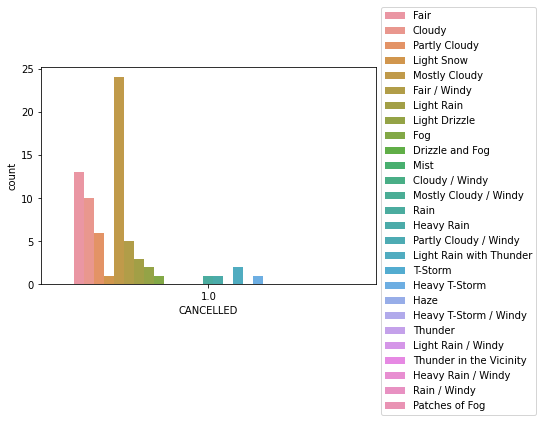

In [13]:
sns.countplot(x=df[df['CANCELLED']==1]['CANCELLED'],hue=df['Condition'])
plt.legend(bbox_to_anchor=(1,1.3))

df1 = df.drop(['WHEELS_ON','WHEELS_OFF','DEST','FL_DATE','DEP_TIME',
         'TAXI_IN','CRS_ARR_TIME',"AIR_TIME",'ACTUAL_ELAPSED_TIME','CRS_ELAPSED_TIME'],axis=1)

df1.sort_values('time',inplace=True)
df1.set_index('time').to_csv('/home/shaury/Desktop/pvsc/dataset/final.csv')